In [1]:
from squlearn.feature_map.layered_feature_map import LayeredPQC,VariableGroup,LayerPQC
import numpy as np
from qiskit.circuit import ParameterVector

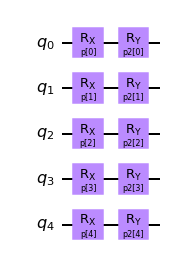

In [2]:
"""Common mistakes and some non-trivial errors you should know about"""

x_var = VariableGroup("x1",size=2)
x_var2 = VariableGroup("x2",size = 3)
p_var = VariableGroup("p")
p_var2 = VariableGroup("p2")

# As it was already said returning the circuit of a feature map requires you to put the parameter vector of each variable group used in the right order:
feature_map_with_param = LayeredPQC(num_qubits = 5, variable_groups = (x_var,x_var2,p_var,p_var2))
feature_map_with_param.Rx(p_var2)
feature_map_with_param.Ry(p_var)
x1 = ParameterVector("x1", feature_map_with_param.get_number_of_variables(x_var))
x2 = ParameterVector("x2", feature_map_with_param.get_number_of_variables(x_var2))
p = ParameterVector("p", feature_map_with_param.get_number_of_variables(p_var))
p2 = ParameterVector("p2", feature_map_with_param.get_number_of_variables(p_var2))
# be sure to use the name of the parameter vector for each variable group in the brackets:
feature_map_with_param.get_circuit(x1,x2,p2,p).draw()# this will assign the parameter vector to the wrong variable group (p2 to p and p to p2)





In [3]:
# The same example without the second operation will raise an error, because the parameter vector p_var2 has length 0 (it should have length 5 but p and p2 are in the wrong order)
x_var = VariableGroup("x1",size=2)
x_var2 = VariableGroup("x2",size = 3)
p_var = VariableGroup("p")
p_var2 = VariableGroup("p2")



feature_map_with_param = LayeredPQC(num_qubits = 5, variable_groups = (x_var,x_var2,p_var,p_var2))
feature_map_with_param.Rx(p_var2)
x1 = ParameterVector("x1", feature_map_with_param.get_number_of_variables(x_var))
x2 = ParameterVector("x2", feature_map_with_param.get_number_of_variables(x_var2))
p = ParameterVector("p", feature_map_with_param.get_number_of_variables(p_var))
p2 = ParameterVector("p2", feature_map_with_param.get_number_of_variables(p_var2))
# be sure to use the name of the parameter vector for each variable group in the brackets:
feature_map_with_param.get_circuit(x1,x2,p2,p).draw()# this will raise an error

IndexError: list index out of range

In [ ]:
# You should avoid it, to use the same variable group for a new feature map, which was already used for an old feature map, otherwise it might not work:
# e.g.

test_feature_map = LayeredPQC(number_of_qubits = 5, variable_groups = (x_var,x_var2,p_var, p_var2))
test_feature_map.cu_entangling(x_var, x_var2, p_var, p_var2)

error_string = "-H-X-Y-Z-Rx(p)"
error_feature_map = LayeredPQC.from_string(number_of_qubits = 5, variable_groups = (x_var,x_var2,p_var), gate_layers = error_string)
error_feature_map.get_circuit(x1,x2,p) # this will raise an index error


In [ ]:
# the same error occurs if you declare a parameter vector of size n and check the nth entry

param_error = ParameterVector("Error",1)
param_error[0]
param_error[1] # this will raise the same index error as above

# So always initialize new variable groups for a new feature map

In [ ]:
# Always make sure to differentiate between upper case and lower case letters, if you use from_string:

operation_string2 = "-Y-Z-3[H-x]" # x should be a capital letter
feature_map_with_wrong_string = LayeredPQC.from_string(num_qubits=2, variable_groups=(x_var,x_var2,p_var), gate_layers=operation_string2)
feature_map_with_wrong_string.get_circuit(x1,x2,p).draw()

# So remember:
# Single layer gates starts always with upper case letters followed by lower case letters:
# X, Y, Z, Rx, Ry, Rz, P, U
# Entangling layer gates have always lower case letters (but the strategies "NN" and "AA" are in capital letters)